## Backpropagation

### Part I. Classic

Do a forward pass (calculate green values), and a backward pass (calculate gradients, red
values).

![title](HA4_backprop.png)

Forward Pass:
ReLU(x) = max(0, x) = max(0, (-2*3*) + (-1*4)) = max(0, -6 + (-4)) = max(0, -10) = 0

Backward Pass:
z<0  ==> gradient = 0, so all gradients for x_i and w_i = 0

### Part II. Some coding bits

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def affine(x, w, b):
    return w * x + b
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def gaussian(x):
    return np.exp(-x*x)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
def mse(y,yout):
    return np.mean((y-yout)*(y-yout))
def derivative_weight(x, y, w, b):
    return -(2 / len(x)) * np.sum((y-np.sum((w*x+b), axis=1)).reshape(-1, 1)*x, axis=0)
def derivative_bias(x, y, w, b):
    return -(2 / len(x)) * np.sum((y-np.sum((w*x+b), axis=1)).reshape(-1, 1), axis=0)

In [29]:
x = 1.

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

In [30]:
### do the forward pass of the network
z_2, z_3 = 0, 0
def forward():
    global z_2, z_3, h_1_2
    z_2 = affine(x, w_1, b_1)
    h_1_2 = sigmoid(z_2)
    z_3 =  np.dot(w_2, h_1_2) + b_2

In [32]:
forward()
z_3

array([1.38079708])

Is the output of the network close to the actual value?

In [33]:
loss = mse(z_3, gaussian(x))
loss

1.0260021389535428

Різниця складає 1.0260021389535428

In [34]:
#### DERIVATIVES CALCULATION
### enter your code here
lr = 0.01
dw_2 = derivative_weight(np.array([h_1_2]), np.array([gaussian(x)]), w_2, b_2)
db_2 = derivative_bias(np.array([h_1_2]), np.array([gaussian(x)]), w_2, b_2)

d_2 = db_2*w_2

dw_1 = d_2*sigmoid_derivative(z_2)*x
db_1 = d_2*sigmoid_derivative(z_2)

##### WEIGHTS UPDATE
### enter your code here
w_1 -= dw_1*lr
w_2 -= dw_2*lr

b_1 -= db_1*lr
b_2 -= db_2*lr

db_1, dw_1

(array([ 0.42268688, -1.00645882]), array([ 0.42268688, -1.00645882]))

In [35]:
### do again the forward pass of the network
forward()
z_3

array([1.29324928])

Did output become closer to the actual value of the function?

In [36]:
loss = mse(z_3, gaussian(x))
loss

0.8563093295913285

Без lr результат складав аж 63

### wrap things in to a loop

In [38]:
N = 50000
lr = 0.01

In [40]:
X = np.linspace(-5.0, 5.0, 500)

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])


for i in range(N):
    x = np.random.choice(X)
    actual = gaussian(x)
    #### FORWARD PASS
    forward()

    #### DERIVATIVES CALCULATION
    dw_2 = derivative_weight(np.array([h_1_2]), np.array([gaussian(x)]), w_2, b_2)
    db_2 = derivative_bias(np.array([h_1_2]), np.array([gaussian(x)]), w_2, b_2)

    dw_1 = db_2*w_2*sigmoid_derivative(z_2)*x
    db_1 = db_2*w_2*sigmoid_derivative(z_2)

    ##### WEIGHTS UPDATE
    w_1 -= dw_1*lr
    w_2 -= dw_2*lr

    b_1 -= db_1*lr
    b_2 -= db_2*lr

Now let's plot things and see what they look like.

In [41]:
z1 = []
z2 = []
h1 = []
h2 = []
z3 = []

for x in X:
    forward()

    z1.append(z_2[0])
    z2.append(z_2[1])

    h1.append(h_1_2[0])
    h2.append(h_1_2[1])

    z3.append(z_3)

z1 = np.array(z1)
z2 = np.array(z2)
h1 = np.array(h1)
h2 = np.array(h2)
z3 = np.array(z3)
out = z3

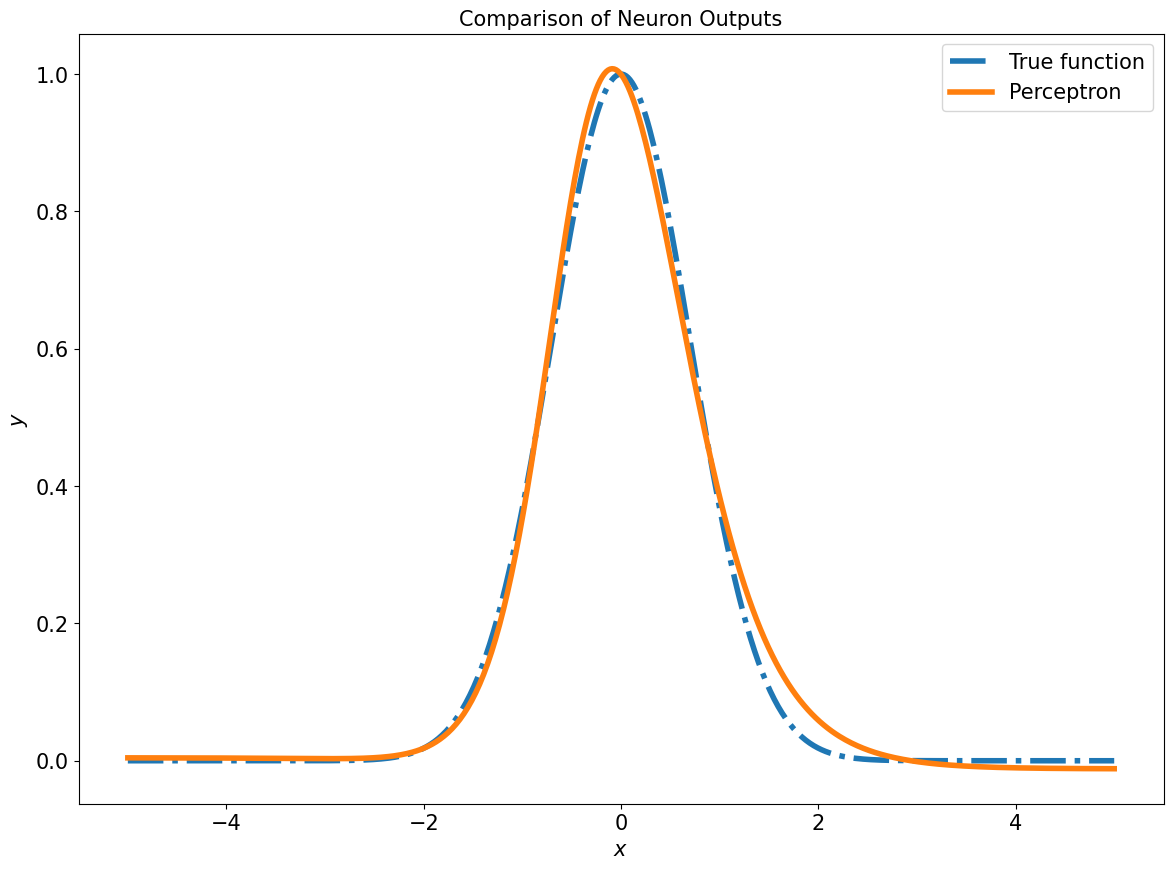

In [42]:
### Uncomment and run when z's and h's computed

SIZE = 15

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(X, gaussian(X), lw=4, ls = '-.', label='True function')
ax.plot(X, out, lw=4, label='Perceptron')
# ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

Графіки майже співпадають.

### Classification problem

Fill out the code for the following classification problem. Implement:
- foward pass
- backward pass
- weight updates

In [43]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

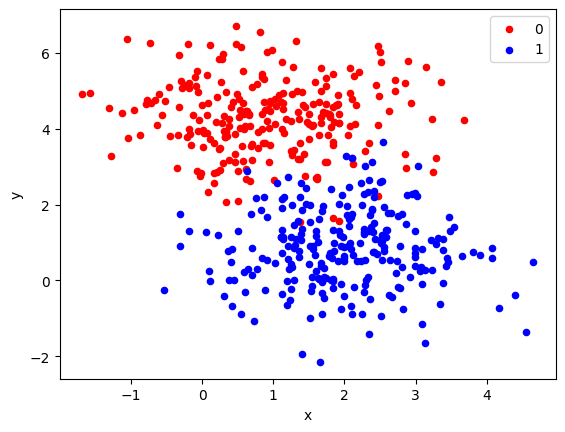

In [44]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [47]:
x = X_test

In [48]:
##### initialization ('ones')
w_1 = np.array([1, 1])
b_1 = np.array([1])

In [49]:
z1 = x@w_1 + b_1

# Node outputs
h1 = sigmoid(z1)

### Check the accuracy

In [50]:
pred = [int(score > 0.5) for score in h1]
sum(pred == y_test) / len(y_test)

0.45

### generalization ==> wrap into a proper loop

In [310]:
### Loop

In [51]:
N = 10000 # epochs

In [64]:
def log_loss(y_pred, y_true):
    eps = 1e-12
    ypred = np.clip(y_pred, eps, 1 - eps)
    d = -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))
    return d

In [65]:
batch_size = 10 # 2, 4, 8, 16, 32, ... 10 is also an example

##### initialization

w_1 = np.array([1.,1.])
b_1 = np.array([1.])


for i in range(N):
    perm = np.random.permutation(len(X_train))
    X_train = X_train[perm]
    y_train = y_train[perm]

    for batch_id in range(int(len(X_train)/batch_size)):
        x = X_train[batch_id*batch_size:(batch_id+1)*batch_size]
        y = y_train[batch_id*batch_size:(batch_id+1)*batch_size]

        m = x.shape[0]
        #### FORWARD PASS
        z_1 = x@w_1+b_1
        h_1 = sigmoid(z_1)


        #### DERIVATIVES CALCULATION
        dw1 = np.mean(x*(log_loss(h_1, y)*sigmoid_derivative(z_1)).reshape(-1, 1), axis=0)
        db1 = np.mean(log_loss(h_1, y)*sigmoid_derivative(z_1))


        ##### WEIGHTS UPDATE
        w_1 -= dw1*lr
        b_1 -= db1*lr

In [54]:
from sklearn.metrics import accuracy_score

In [66]:
### check the accuracy on the test set
y_pred = sigmoid(X_test @ w_1 + b_1)
accuracy_score(y_test, y_pred > 0.5)

0.95

Точність виявилася дуже високою.